In [3]:
cv2.__version__

'4.5.3'

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg" )

In [25]:
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [26]:
from PIL import Image

im_path  = 'input/3.jpg'
im = Image.open(im_path)

img = cv2.imread(im_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [27]:
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# plt.imshow(img)

In [29]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [30]:
# cv2.imshow("0",blob[0][0])
# cv2.imshow("1",blob[0][1])
# cv2.imshow("2",blob[0][2])

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [31]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [32]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [33]:
class_labels = []
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        class_labels.append(label)
        print(label)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

print()

person
cow



time of creation of image is -  2015:12:04 09:39:54
classes in the image are -  ['cow', 'person']
image name is -  3.jpg


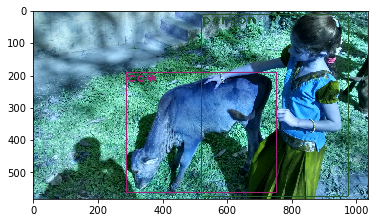

In [34]:
exif = im.getexif()
creation_time = exif.get(36867)
print('time of creation of image is - ',creation_time)
print('classes in the image are - ', list(set(class_labels)))
print('image name is - ',str.split(im_path,'/')[-1])
plt.imshow(img);

In [35]:
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()